<a href="https://colab.research.google.com/github/nicha2301/AI/blob/master/ProjectML2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

In [ ]:
!pip install category_encoders

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
from tabulate import tabulate

In [196]:
data = pd.read_csv('car-prediction.csv')
data.shape

(11914, 16)

In [234]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


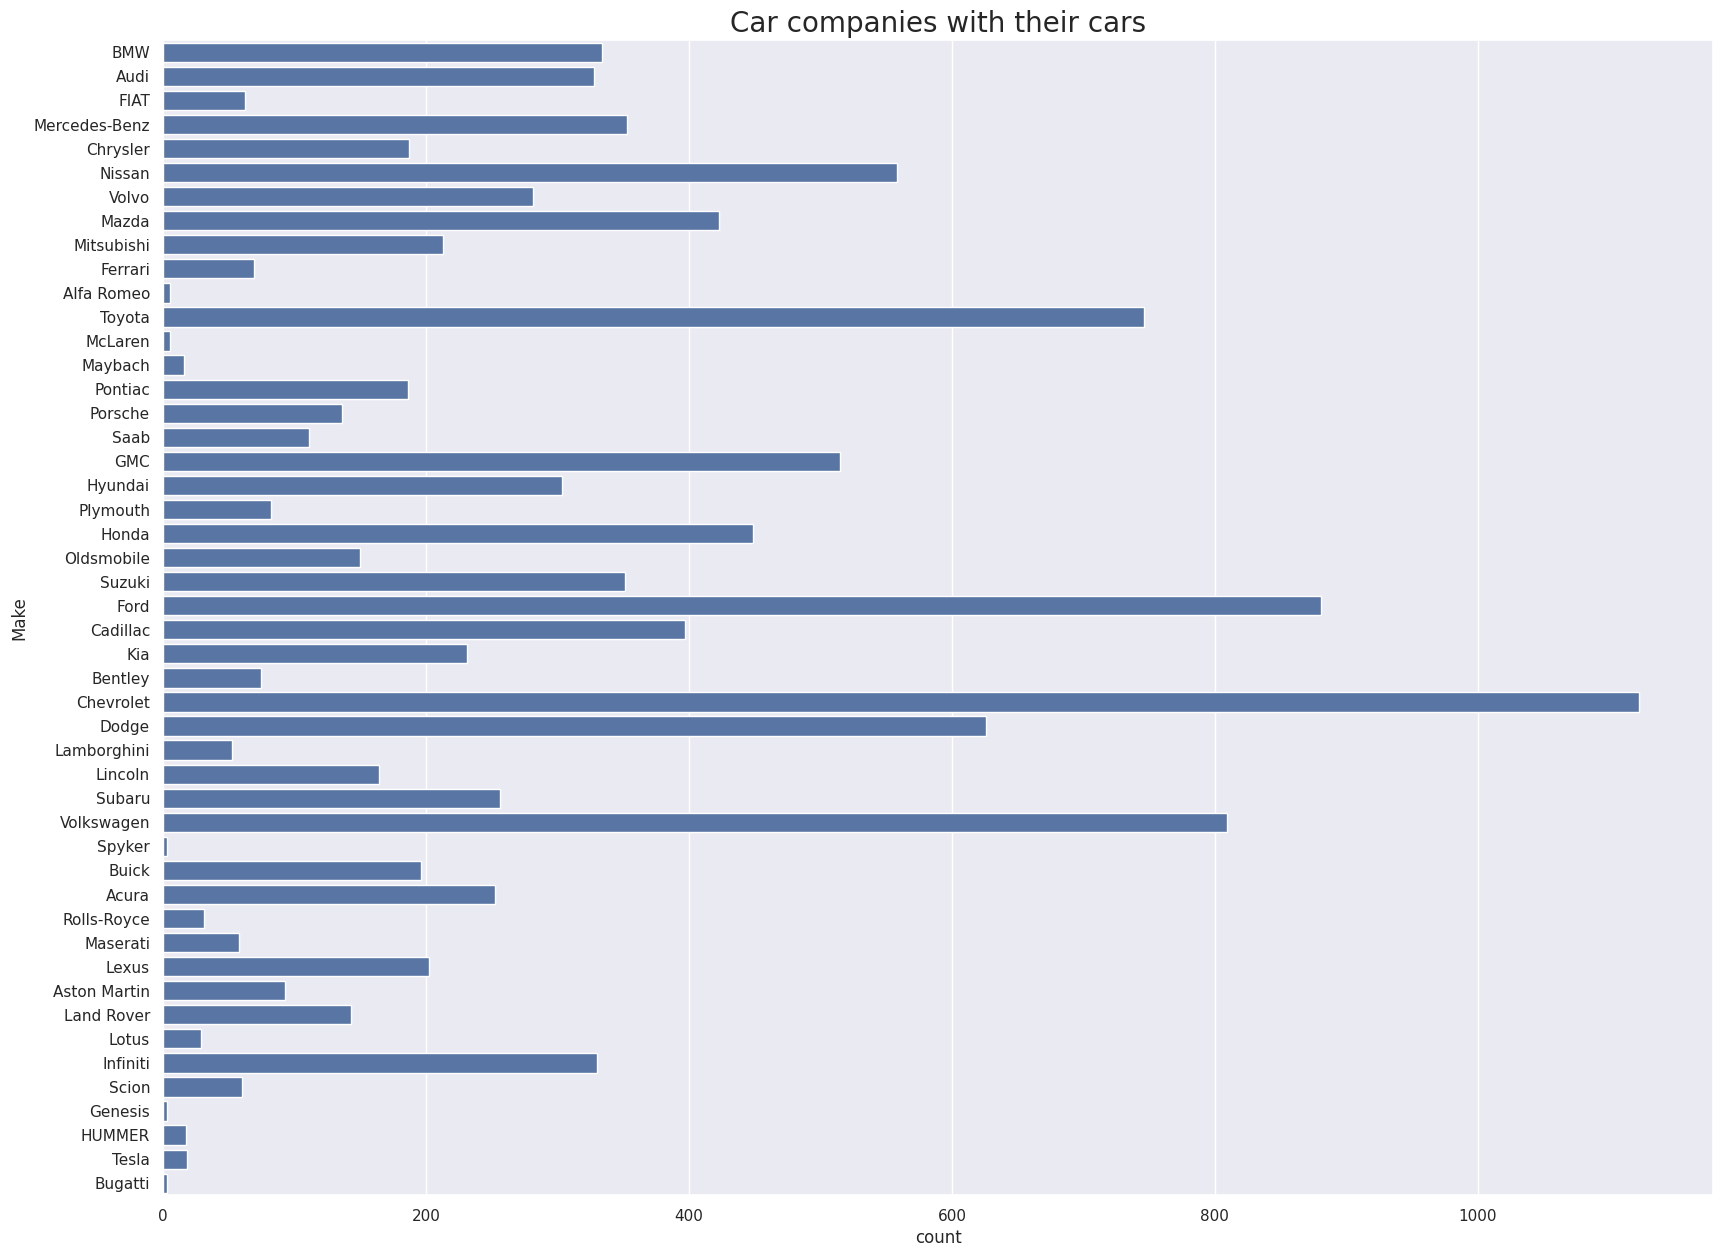

In [198]:
#Countplot of different car companies
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

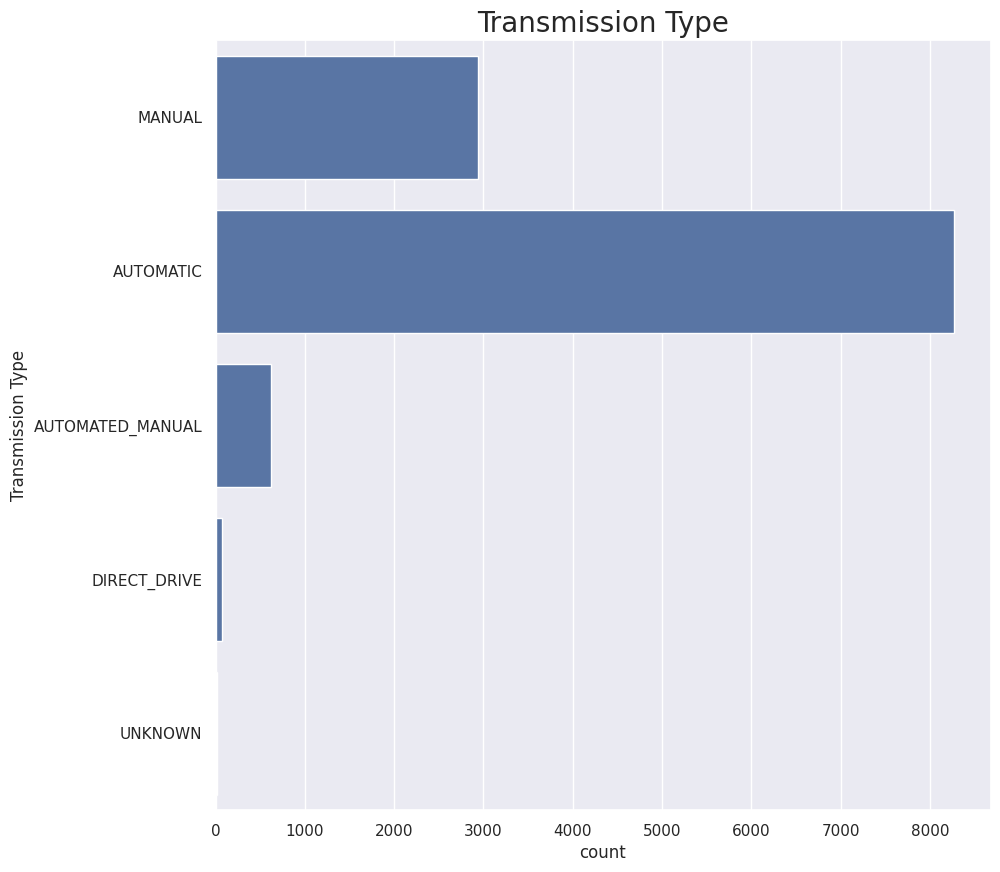

In [249]:
#Counting the cars based on transmission type
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'])
plt.title("Transmission Type", fontsize = 20)
plt.show()

<Axes: >

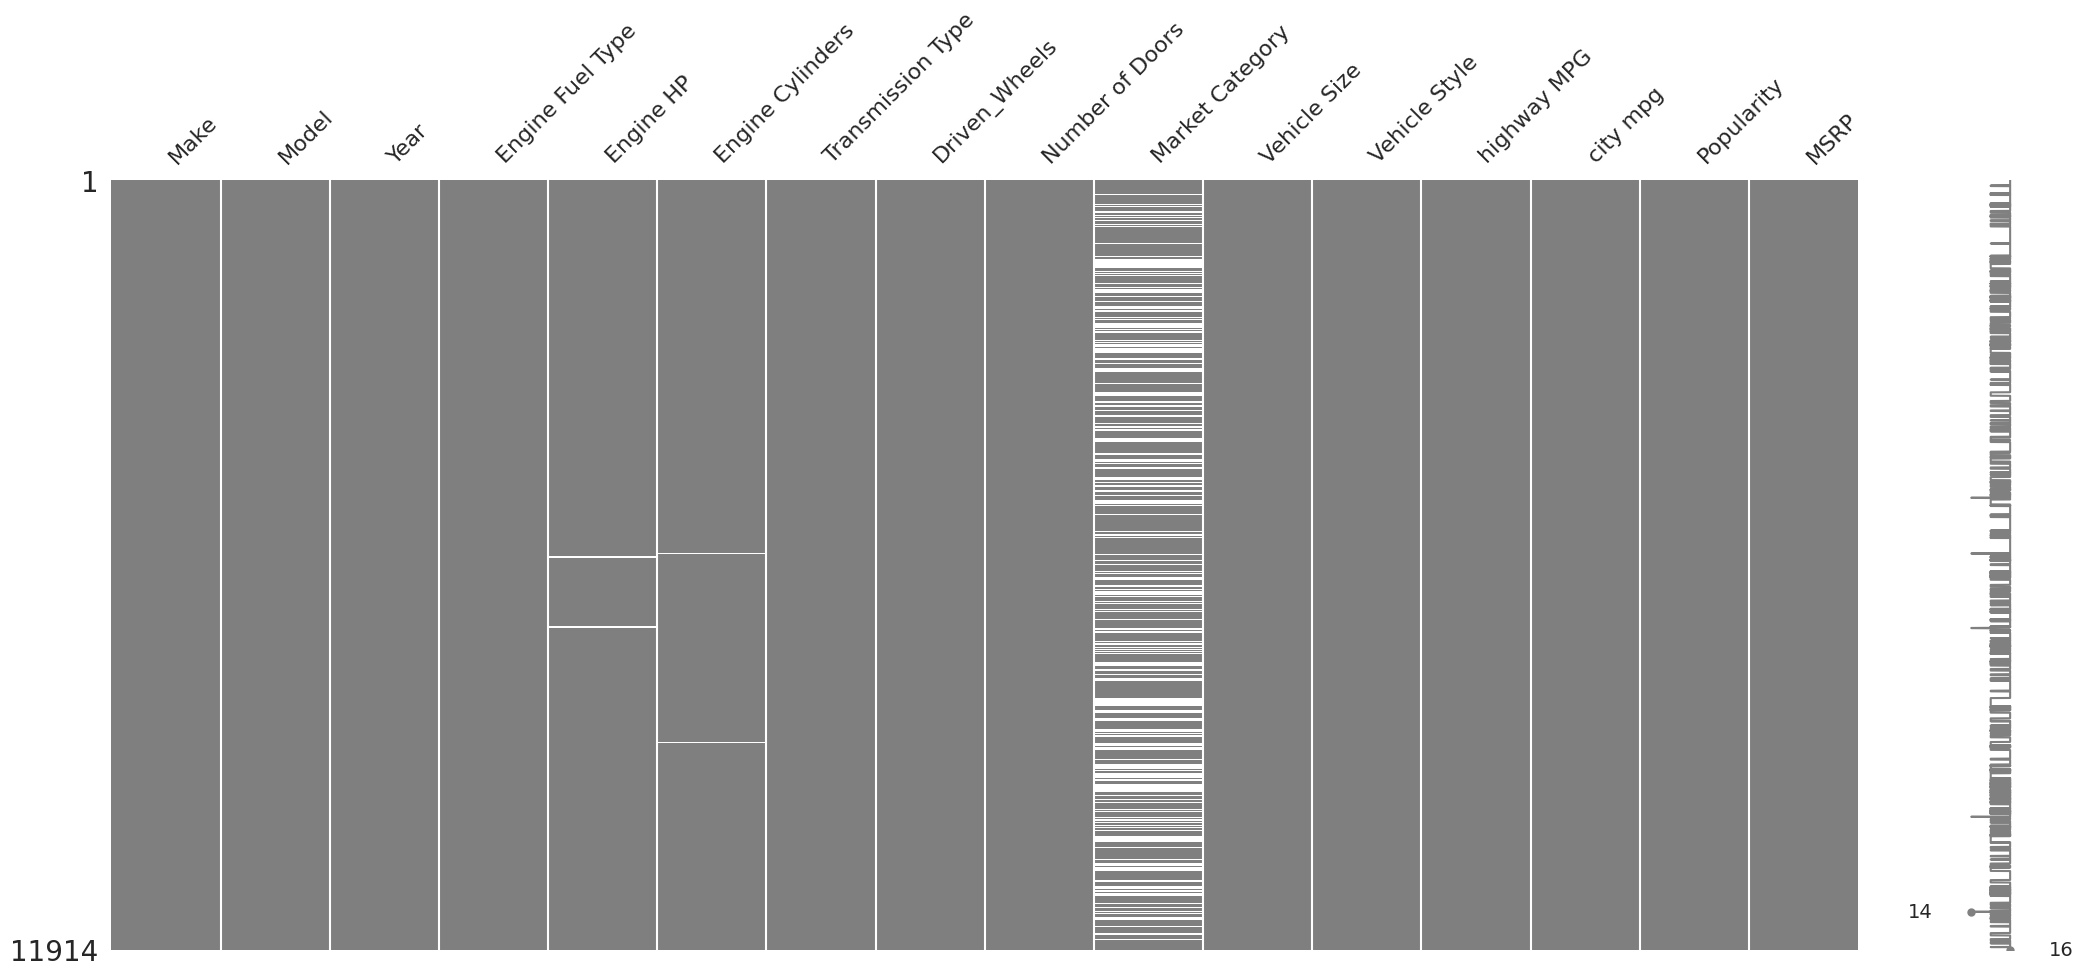

In [200]:
#Missing values
msno.matrix(data, color = (0.5, 0.5, 0.5))

Heatmap

<Axes: >

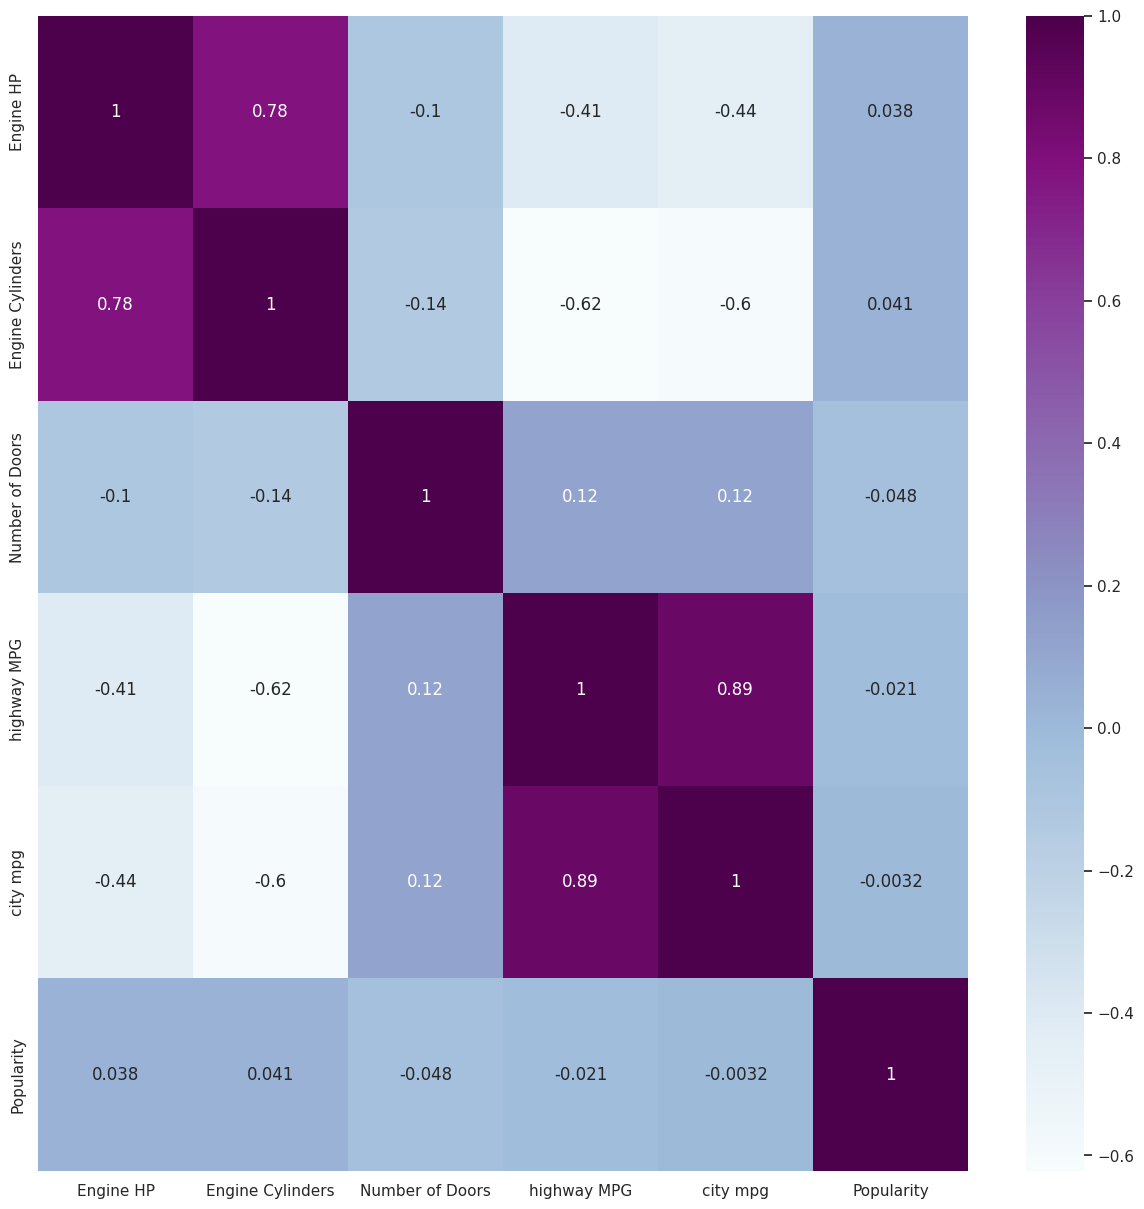

In [201]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [202]:
#Kiểm tra các giá trị NULL
data['Number of Doors'].median()
data['Number of Doors'].fillna(4.0, inplace = True)
data['Number of Doors'].isnull().sum()

data['Engine Fuel Type'].unique()
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)
data['Engine Fuel Type'].isnull().sum()

data['Engine HP'].mean()
data['Engine HP'].median()
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)
data['Engine HP'].isnull().sum()

data['Engine Cylinders'].unique()
data['Engine Cylinders'].fillna(4, inplace = True)

data['Number of Doors'].fillna(4.0, inplace=True)
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)
data['Engine Cylinders'].fillna(4, inplace=True)

data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [203]:
#Bỏ cột vì nó không còn cần thiết nữa.
data.drop(['Market Category'], inplace = True, axis = 1)

In [204]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [218]:
#Xáo trộn dữ liệu
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

In [221]:
# #Mã hóa dữ liệu
categorical_features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])


**MLP Regressor**

In [222]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo Pipeline bao gồm cả tiền xử lý và mô hình MLPRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1500, learning_rate_init=0.01, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1, random_state=42))
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_nn_reg = pipeline.predict(X_test)

# Tính toán các chỉ số đánh giá
mse_nn_reg = mean_squared_error(y_test, y_pred_nn_reg)
r2_nn_reg = r2_score(y_test, y_pred_nn_reg)

print(f"Neural Networks - Mean Squared Error: {mse_nn_reg}")
print(f"Neural Networks - R^2 Score: {r2_nn_reg}")


Neural Networks - Mean Squared Error: 771234438.9782633
Neural Networks - R^2 Score: 0.7279707707374998


**Linear Regression**

In [223]:
# Tạo Pipeline bao gồm cả tiền xử lý và mô hình Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lin_reg = pipeline.predict(X_test)

# Tính toán các chỉ số đánh giá
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression - Mean Squared Error: {mse_lin_reg}")
print(f"Linear Regression - R^2 Score: {r2_lin_reg}")

Linear Regression - Mean Squared Error: 1234648647.5064673
Linear Regression - R^2 Score: 0.5645156608461066


Decision Tree Regressor

In [224]:
# Tạo Pipeline bao gồm cả tiền xử lý và mô hình Decision Tree Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_dt = pipeline.predict(X_test)

# Tính toán các chỉ số đánh giá
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R^2 Score: {r2_dt}")

Decision Tree - Mean Squared Error: 127054867.57013826
Decision Tree - R^2 Score: 0.95518530299951


**Tổng hợp**

In [248]:
# Kết quả của Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# Kết quả của Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Kết quả của MLP Regressor
mse_nn_reg = mean_squared_error(y_test, y_pred_nn_reg)
r2_nn_reg = r2_score(y_test, y_pred_nn_reg)

# Tạo một DataFrame để so sánh các mô hình
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'MLP Regressor'],
    'Mean Squared Error': [mse_lin_reg, mse_dt, mse_nn_reg],
    'R^2 Score': [r2_lin_reg, r2_dt, r2_nn_reg]
})

results_formatted = results.copy()
results_formatted['Mean Squared Error'] = results_formatted['Mean Squared Error'].apply(lambda x: f"{x:,.0f}")
results_formatted['R^2 Score'] = results_formatted['R^2 Score'].apply(lambda x: f"{x:.4f}")

print("------------------------")
print(tabulate(results_formatted, headers='keys', tablefmt='fancy_grid'))

------------------------
╒════╤═══════════════════╤══════════════════════╤═════════════╕
│    │ Model             │ Mean Squared Error   │   R^2 Score │
╞════╪═══════════════════╪══════════════════════╪═════════════╡
│  0 │ Linear Regression │ 1,234,648,648        │      0.5645 │
├────┼───────────────────┼──────────────────────┼─────────────┤
│  1 │ Decision Tree     │ 127,054,868          │      0.9552 │
├────┼───────────────────┼──────────────────────┼─────────────┤
│  2 │ MLP Regressor     │ 771,234,439          │      0.728  │
╘════╧═══════════════════╧══════════════════════╧═════════════╛
